# Introduction: 

## In this notebook I will explore the zomato dataset trying to find relations between features and have better insights to the data write conclusions and get facts out of the data in it

# Explore the dataset:

In [179]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import string

zomato = pd.read_csv('./zomato.csv')
print(zomato.info())
zomato.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### The rating column should be numeric but it is an object so I will work on this

In [180]:
def convert_and_mark(rate:str):
    try:
        return float(rate.strip()[:-2])
    except:
        return np.nan
ratings = zomato['rate'].apply(convert_and_mark).dropna().reset_index(drop= True)
ratings.shape[0]

41665

#### it was and object because it had (/5, NEW, -) so I deleted them using the function below that takes only the rating and returns a nan in case it can't turn it to a float then drop nans leaving me only with 41665 cells in this column out of 51717 and a lot of work to impute

In [181]:
rating_nans = zomato[zomato['rate'].isna()]
rating_other_values= zomato[zomato['rate'].str.strip().isin(['NEW', '-'])]
missings = pd.concat([rating_nans, rating_other_values])
print(missings[(missings['rate'] == 'NEW') & (missings['votes'] == 0)].shape[0], missings[missings['rate'] == 'NEW'].shape[0])
print(missings[(missings['rate'].isna()) & (missings['votes'] == 0)].shape[0], missings[missings['rate'].isna()].shape[0])
missings.head()

2208 2208
7731 7775


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,NaN,"South Indian, Chinese",100,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,NaN,"Bakery, Desserts",500,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",NaN,South Indian,400,[],[],Delivery,Banashankari
92,https://www.zomato.com/bangalore/annapooranesh...,"625, 5th Cross Road, Hanumanthnagar, Banashank...",Annapooraneshwari Mess,No,No,NaN,0,+91 9742009518,Banashankari,Mess,NaN,South Indian,200,[],[],Delivery,Banashankari
107,https://www.zomato.com/bangalore/coffee-shopee...,"1722, 13th Main Road 31st Cross BSK, 2nd Stage...",Coffee Shopee,No,No,NaN,0,+91 9591504624,Banashankari,"Takeaway, Delivery",NaN,Beverages,250,[],[],Delivery,Banashankari


##### This is more likely to be a MNAR as almost all the missings has votes of zero so imputing those values can be problematic and if I dropped them I will still have a decent number to work on (41665 rows)

In [182]:
zomato['rate'] = zomato['rate'].apply(convert_and_mark)

In [183]:
zomato = zomato.dropna(subset=['rate'])
zomato.count()

url                            41665
address                        41665
name                           41665
online_order                   41665
book_table                     41665
rate                           41665
votes                          41665
phone                          40851
location                       41665
rest_type                      41516
dish_liked                     23462
cuisines                       41654
approx_cost(for two people)    41418
reviews_list                   41665
menu_item                      41665
listed_in(type)                41665
listed_in(city)                41665
dtype: int64

##### After dropping the missing values the dataset has now 41665 rows except for the approx_cost, phone, rest_type, dish_liked and cuisines

## Handling the missing values at costs and converting it to a number

In [184]:
diff_values= []
def convert_approx_cost(cost:str):
    try:
        cost= str(cost)
        return float(cost.strip().replace(',', ''))
    except:
        if pd.isna(cost):
            diff_values.append()   
        return np.nan()
costs= zomato['approx_cost(for two people)'].apply(convert_approx_cost).dropna()
print(diff_values)
print(costs.shape[0])
costs.head()

[]
41418


0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: approx_cost(for two people), dtype: float64

### The (,) was the reason why it was defined as object after removing it we have only 247 missing values out of 41665 so they can be easily imputed by mean or median

In [185]:
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].apply(convert_approx_cost).fillna(np.median(costs))
zomato['approx_cost(for two people)'].isna().sum()

np.int64(0)

### After imputing the missing values with the median and converting the approximate costs to int it's clean

## cleaning the rest type column

In [186]:
missings_count = zomato.shape[0] - zomato['rest_type'].notna().sum()
missings_count

np.int64(149)

### missing values count is too small relatively so imputing it with the mode would be a decent approach and won't affect the data integrity

In [187]:
rest_type_mode = zomato['rest_type'].dropna().mode()[0]
zomato['rest_type'] = zomato['rest_type'].apply(lambda type: rest_type_mode if pd.isna(type) else type)
zomato['rest_type'].isna().sum()

np.int64(0)

## The cuisines only have 1 missing value so it can be imputed using mode too

In [188]:
cuisines_mode = zomato['cuisines'].dropna().mode()[0]
zomato['cuisines'] = zomato['cuisines'].apply(lambda cuisine: cuisines_mode if pd.isna(cuisine) else cuisine)
zomato['cuisines'].isna().sum()

np.int64(0)

## Exploring the dish liked so we can know if we will delete or just impute it

In [189]:
zomato[pd.isna(zomato['dish_liked'])].head(30)
zomato[(pd.isna(zomato['dish_liked'])) & (zomato['book_table'] == 'Yes')].head(30)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
224,https://www.zomato.com/bangalore/the-grillo-ja...,"126, Near Ganesha Temple, 7th Main, 4th Block,...",The Grillo,Yes,Yes,2.8,80,+91 8043940555,Jayanagar,Casual Dining,NaN,"South Indian, Arabian, Chinese, North Indian, ...",500.0,"[('Rated 3.0', 'RATED\n It was late afternoon...",[],Delivery,Banashankari
872,https://www.zomato.com/bangalore/mango-greens-...,"99/4, Nataraja Layout, 7th Phase, JP Nagar, Ba...",Mango Greens,No,Yes,3.9,49,+91 9880863789\r\n080 26851030,JP Nagar,Casual Dining,NaN,"North Indian, Continental, Chinese",900.0,"[('Rated 5.0', 'RATED\n If you are located wi...",[],Buffet,Bannerghatta Road
894,https://www.zomato.com/bangalore/shee-sha-cafe...,"225/226, Omkar Nagar, Arkere, Above Arekere Ca...",Shee-Sha Cafe,No,Yes,3.6,39,+91 9739533445,Bannerghatta Road,"Cafe, Casual Dining",NaN,"Cafe, North Indian, Chinese, Continental",800.0,"[('Rated 5.0', 'RATED\n If u love hooka , thi...",[],Cafes,Bannerghatta Road
1488,https://www.zomato.com/bangalore/eagle-ridge-b...,"Eagle Ridge Resort, Begur- Koppa Road, Near Ba...",Eagle Ridge,No,Yes,3.2,8,+91 9900543592,Bannerghatta Road,Casual Dining,NaN,"South Indian, North Indian, Chinese",700.0,"[('Rated 1.0', 'RATED\n Worst place to be.\nG...",[],Delivery,Bannerghatta Road
1520,https://www.zomato.com/bangalore/shee-sha-cafe...,"225/226, Omkar Nagar, Arkere, Above Arekere Ca...",Shee-Sha Cafe,No,Yes,3.6,39,+91 9739533445,Bannerghatta Road,"Cafe, Casual Dining",NaN,"Cafe, North Indian, Chinese, Continental",800.0,"[('Rated 5.0', 'RATED\n If u love hooka , thi...",[],Delivery,Bannerghatta Road
1699,https://www.zomato.com/bangalore/mango-greens-...,"99/4, Nataraja Layout, 7th Phase, JP Nagar, Ba...",Mango Greens,No,Yes,3.9,49,+91 9880863789\r\n080 26851030,JP Nagar,Casual Dining,NaN,"North Indian, Continental, Chinese",900.0,"[('Rated 5.0', 'RATED\n If you are located wi...",[],Delivery,Bannerghatta Road
1791,https://www.zomato.com/bangalore/thirsty-tiger...,"11, 2nd Floor, 14th Main, Puttenahalli Road, K...",Thirsty Tiger,No,Yes,3.5,51,080 49652109,JP Nagar,"Bar, Casual Dining",NaN,"Continental, Finger Food",1300.0,"[('Rated 4.0', ""RATED\n Amazing place. Saturd...",[],Delivery,Bannerghatta Road
1906,https://www.zomato.com/bangalore/mango-greens-...,"99/4, Nataraja Layout, 7th Phase, JP Nagar, Ba...",Mango Greens,No,Yes,3.9,48,+91 9880863789\r\n080 26851030,JP Nagar,Casual Dining,NaN,"North Indian, Continental, Chinese",900.0,"[('Rated 5.0', 'RATED\n If you are located wi...",[],Desserts,Bannerghatta Road
1984,https://www.zomato.com/bangalore/eagle-ridge-b...,"Eagle Ridge Resort, Begur- Koppa Road, Near Ba...",Eagle Ridge,No,Yes,3.2,8,+91 9900543592,Bannerghatta Road,Casual Dining,NaN,"South Indian, North Indian, Chinese",700.0,"[('Rated 1.0', 'RATED\n Worst place to be.\nG...",[],Dine-out,Bannerghatta Road
2004,https://www.zomato.com/bangalore/shee-sha-cafe...,"225/226, Omkar Nagar, Arkere, Above Arekere Ca...",Shee-Sha Cafe,No,Yes,3.6,39,+91 9739533445,Bannerghatta Road,"Cafe, Casual Dining",NaN,"Cafe, North Indian, Chinese, Continental",800.0,"[('Rated 5.0', 'RATED\n If u love hooka , thi...",[],Dine-out,Bannerghatta Road


### After having a first look at the head of the missing values of dish liked I saw the first 30 missing values all with No at the book table so I thought maybe it is a MNAR that is related to the book table variable but after having a second look it's more likely to be a MAR with nearly 57% missing values so dropping them will be a big loss to the data so it leaves me with the only choice to drop the column

In [190]:
zomato = zomato.drop(columns= ['dish_liked'])
zomato

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


### Exploring menu item

In [191]:
def to_list(s:str):
    s= s[1:-1]
    if len(s.strip()) == 0:
        return []
    else:
        return s.strip().split(',')
zomato['menu_item'] = zomato['menu_item'].apply(to_list)
missing_lists = zomato[zomato['menu_item'].apply(lambda items: len(items) == 0)]
missing_lists.shape[0]

30700

### The missings at the value items are 30700 out of 41665 and that's a big number to be handled or imputed so dropping them would be a better option

In [192]:
zomato = zomato.drop(columns= ['menu_item'])
zomato

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


## Having the dataset ready for the analysis

### Change the columns that has strings splitted with , to lists

In [193]:
#getting data ready for analysis
def clean_string(s:str):
    if pd.isna(s):
        return []
    return [item.strip().strip(string.punctuation) for item in s.split(',') if item.split()]

zomato['cuisines']= zomato['cuisines'].apply(clean_string)
zomato['rest_type']= zomato['rest_type'].apply(clean_string)


### dropping the unnecessary columns

In [194]:
zomato = zomato.drop(columns= ['url', 'phone'])
zomato

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,[Casual Dining],"[North Indian, Mughlai, Chinese]",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,[Casual Dining],"[Chinese, North Indian, Thai]",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"[Cafe, Casual Dining]","[Cafe, Mexican, Italian]",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,[Quick Bites],"[South Indian, North Indian]",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,[Casual Dining],"[North Indian, Rajasthani]",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"[Casual Dining, Bar]","[North Indian, Continental]",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,Whitefield,"[Casual Dining, Bar]","[Andhra, South Indian, Chinese, North Indian]",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,[Bar],[Continental],1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",[Bar],[Finger Food],2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [195]:
print(zomato.dtypes)
zomato.isna().sum()

address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
listed_in(type)                 object
listed_in(city)                 object
dtype: object


address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

## summary statistics

In [196]:
print(zomato['rate'].median())
print(zomato['approx_cost(for two people)'].median())

zomato.describe()

3.7
500.0


,rate,votes,approx_cost(for two people)
count,41665.000000,41665.000000,41665.000000
mean,3.700449,351.653018,602.655850
std,0.440513,881.800960,463.017327
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.000000,500.000000
75%,4.000000,276.000000,700.000000
max,4.900000,16832.000000,6000.000000


#### in the rates part the difference between the mean and median is not that big they're too close which indicates a very decent chance to no outliers (as normally the outliers affect the mean skewing it right or left while it does not affect the median that much) while in the approx cost for 2 people there is a difference with the mean higher than the median which is a decent indicator for outliers on the right side

In [197]:
cost_q1 = np.quantile(zomato['approx_cost(for two people)'], 0.25)
cost_q3 = np.quantile(zomato['approx_cost(for two people)'], 0.75)
cost_iqr = cost_q3 - cost_q1

cost_outliers = zomato[(zomato['approx_cost(for two people)'] > cost_q3 + cost_iqr * 1.5) | (zomato['approx_cost(for two people)'] < cost_iqr * 1.5 - cost_q1)]
cost_outliers.shape[0]

10467

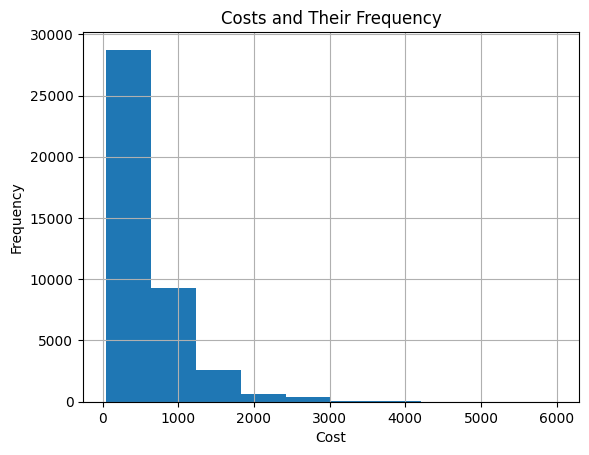

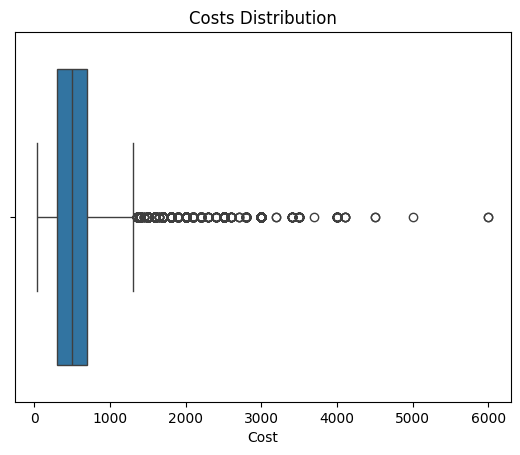

In [198]:
zomato['approx_cost(for two people)'].hist()
plt.ylabel('Frequency')
plt.xlabel('Cost')
plt.title('Costs and Their Frequency')
plt.show()
plt.cla()

sns.boxplot(data=zomato, x='approx_cost(for two people)')
plt.xlabel('Cost')
plt.title('Costs Distribution')
plt.show()

#### A big number of outliers has been detected in the cost so whether we transform it

In [199]:
def log_trans(num):
    try:
        return np.log(num)
    except:
        if num == 0:
            return np.log(num + 1)
        return num
zomato['cost_log'] = zomato['approx_cost(for two people)'].apply(log_trans)
zomato['cost_log']

0        6.684612
1        6.684612
2        6.684612
3        5.703782
4        6.396930
           ...   
51709    6.684612
51711    6.684612
51712    7.313220
51715    7.824046
51716    7.313220
Name: cost_log, Length: 41665, dtype: float64

In [200]:
print(zomato['cost_log'].mean())
print(zomato['cost_log'].median())

6.177820417108889
6.214608098422191


### After handling the outliers, missing data and getting rid of the columns that I won't use anymore I will start the analysis phase

# Data Analysis

## Does the location affect the other features? If yes how does it affect it?

### First we have to take a look at the location and how it affect the type of the services

In [201]:
zomato.head()


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),cost_log
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,[Casual Dining],"[North Indian, Mughlai, Chinese]",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,6.684612
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,[Casual Dining],"[Chinese, North Indian, Thai]",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,6.684612
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"[Cafe, Casual Dining]","[Cafe, Mexican, Italian]",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,6.684612
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,[Quick Bites],"[South Indian, North Indian]",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,5.703782
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,[Casual Dining],"[North Indian, Rajasthani]",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,6.396930


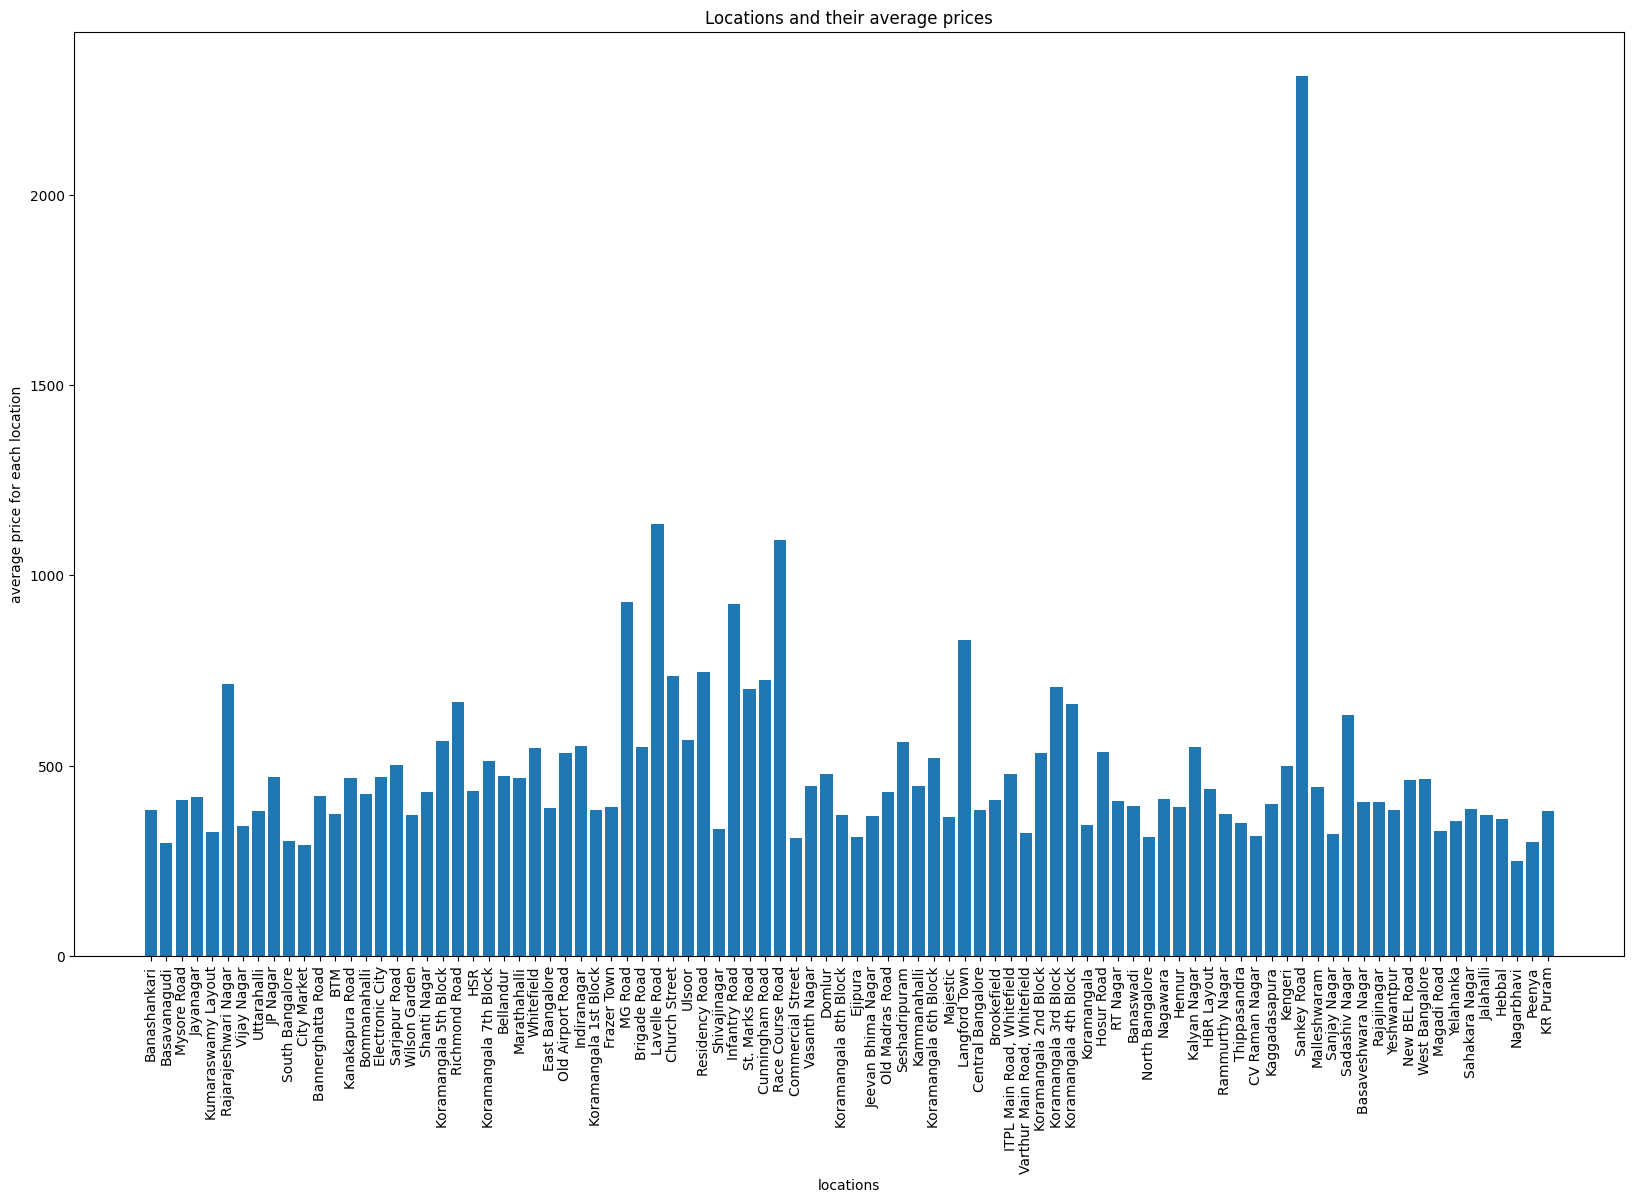

"prices mean": 493.2523629571379, "prices median": 422.7996192072022


{'Banashankari': {'top 5 rest types ordered': ['Quick Bites',
   'Casual Dining',
   'Cafe',
   'Dessert Parlor',
   'Delivery'],
  'top 5 cuisines ordered': ['North Indian',
   'Chinese',
   'South Indian',
   'Fast Food',
   'Cafe'],
  'top 5 types': ['Delivery',
   'Dine-out',
   'Desserts',
   'Cafes',
   'Drinks & nightlife'],
  'available cuisines': ['Mughlai',
   'Desserts',
   'Roast Chicken',
   'Burger',
   'Continental',
   'Tea',
   'Kebab',
   'Biryani',
   'Vietnamese',
   'Thai',
   'Steak',
   'Momos',
   'Italian',
   'Iranian',
   'Asian',
   'Finger Food',
   'Salad',
   'Fast Food',
   'Mangalorean',
   'Japanese',
   'Chinese',
   'Korean',
   'Bakery',
   'Juices',
   'Beverages',
   'Hyderabadi',
   'South Indian',
   'Healthy Food',
   'Seafood',
   'Ice Cream',
   'Andhra',
   'Sandwich',
   'Street Food',
   'North Indian',
   'Pizza',
   'Indonesian',
   'Arabian',
   'American',
   'Mexican',
   'French',
   'Rolls',
   'Cafe',
   'Tibetan',
   'Lebanese',
 

In [238]:
def explore_locations(locations, explore_list: list):
    explored= []
    for location in locations:
        loc_services= []
        loc_services.append(location)
        loc_services.append(zomato[zomato['location'] == location][explore_list])
        explored.append(loc_services)
    return explored

def services(explorations:list):
    stats= {}
    cuisines_found = set(zomato['cuisines'].explode())
    rests_found = set(zomato['rest_type'].explode())
    for explored in explorations:
        df= explored[1]
        rests = df['rest_type'].explode()
        rest_mode =  rests.value_counts(ascending= False).head(5).index.tolist()
        cuisines= df['cuisines'].explode()
        cuisines_mode = cuisines.value_counts(ascending= False).head(5).index.tolist()
        listed_in_mode =  df['listed_in(type)'].value_counts(ascending= False).head(5).index.tolist()
        avg_cost = np.exp(np.mean(df['cost_log']))
        stats_data= {
            'top 5 rest types ordered': rest_mode,
            'top 5 cuisines ordered': cuisines_mode,
            'top 5 types': listed_in_mode,
            'available cuisines': list(set(cuisines)),
            'available rests': list(set(rests)),
            'unavailable cuisines': list(cuisines_found.difference(set(cuisines))),
            'unavailable rests': list(rests_found.difference(set(rests))),
            'average cost for 2 people': avg_cost
        }
        stats[explored[0]] = stats_data
    return stats


locations = zomato['location'].unique()
explored_locations = explore_locations(locations, ['rest_type', 'cuisines', 'listed_in(type)', 'location', 'cost_log'])
stats= services(explored_locations)
locs = list(stats.keys())
avg_prices= [stat['average cost for 2 people'] for stat in stats.values()]
plt.figure(figsize= (20, 12))
plt.bar(locs, avg_prices)
plt.xlabel('locations')
plt.ylabel('average price for each location')
plt.xticks(rotation= 90)
plt.title('Locations and their average prices')
plt.show()
print(f'"prices mean": {np.mean(avg_prices)}, "prices median": {np.median(avg_prices)}')
stats

### in conclusion we can say that the location is a very strong feature that the stats vary differently from one location to another as in the most ordered cuisines, the most frequent rest types and even the rest types and cuisines available and the average prices so ignoring it will lead to either a very generic look that has nothing to do with the real stats or biased/unaccurate look at the data

## Exploring the data after splitting them into locations so a more clear and accurate insight can be seen

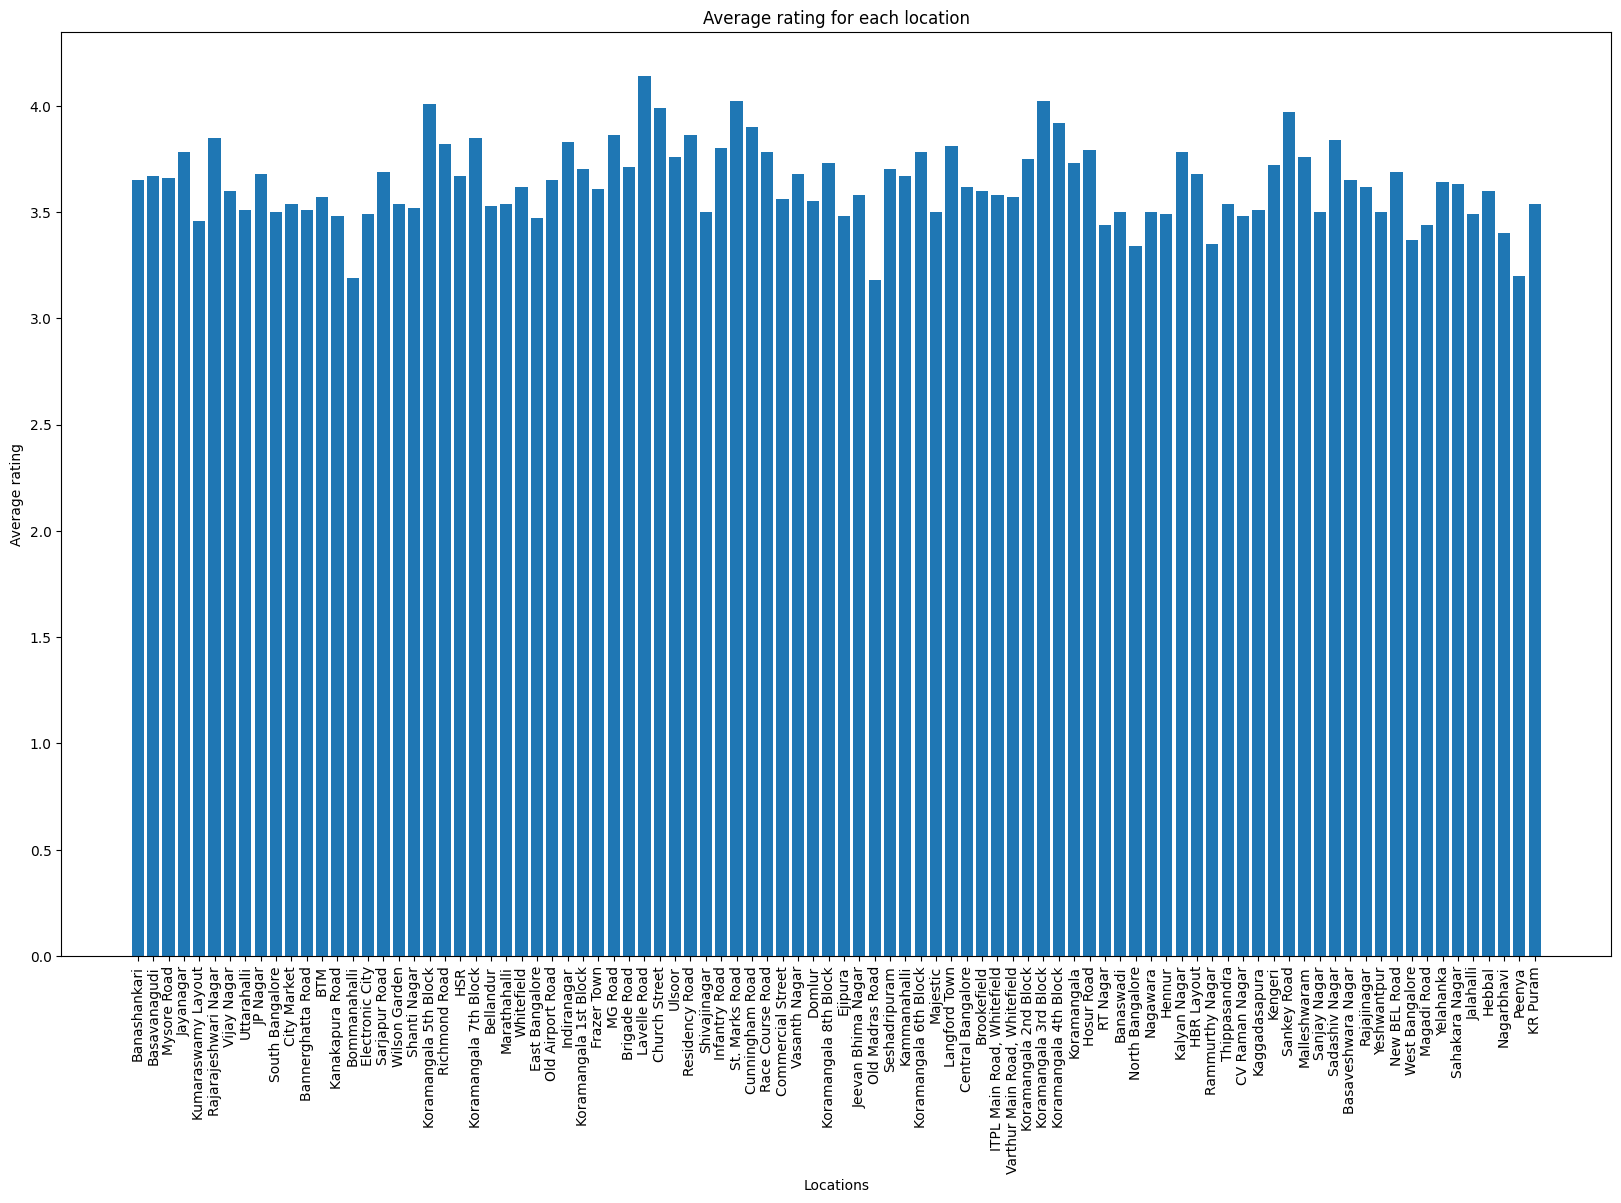

{'Banashankari': np.float64(3.65),
 'Basavanagudi': np.float64(3.67),
 'Mysore Road': np.float64(3.66),
 'Jayanagar': np.float64(3.78),
 'Kumaraswamy Layout': np.float64(3.46),
 'Rajarajeshwari Nagar': np.float64(3.85),
 'Vijay Nagar': np.float64(3.6),
 'Uttarahalli': np.float64(3.51),
 'JP Nagar': np.float64(3.68),
 'South Bangalore': np.float64(3.5),
 'City Market': np.float64(3.54),
 'Bannerghatta Road': np.float64(3.51),
 'BTM': np.float64(3.57),
 'Kanakapura Road': np.float64(3.48),
 'Bommanahalli': np.float64(3.19),
 'Electronic City': np.float64(3.49),
 'Sarjapur Road': np.float64(3.69),
 'Wilson Garden': np.float64(3.54),
 'Shanti Nagar': np.float64(3.52),
 'Koramangala 5th Block': np.float64(4.01),
 'Richmond Road': np.float64(3.82),
 'HSR': np.float64(3.67),
 'Koramangala 7th Block': np.float64(3.85),
 'Bellandur': np.float64(3.53),
 'Marathahalli': np.float64(3.54),
 'Whitefield': np.float64(3.62),
 'East Bangalore': np.float64(3.47),
 'Old Airport Road': np.float64(3.65),
 

In [239]:
def avg_rates(locs):
    rates= {}
    for loc in locs:
        rates[loc] = round(np.mean(zomato[zomato['location'] == loc]['rate']), 2)
    return rates
average_rates = avg_rates(locations)
plt.figure(figsize= (20, 12))
plt.bar(list(average_rates.keys()), list(average_rates.values()))
plt.xlabel('Locations')
plt.ylabel('Average rating')
plt.xticks(rotation= 90)
plt.title('Average rating for each location')
plt.show()
average_rates

In [224]:
average_rating= round(np.mean(zomato['rate']), 2)
average_rating

np.float64(3.7)

### since the average rating is too close even when the location changes then we can say that the average rating is equal to the average of the rate column

## resutrants tend to book tables more or order online?

### First we have to see if the location plays a big role in this as in the cuisines, ...etc part or the values will be close like rating

In [230]:
def orders_percent_location(locations):
    percentage = {}
    for location in locations:
        loc_order= zomato[zomato['location'] == location][['online_order', 'book_table']]
        orders = loc_order.shape[0]
        online = loc_order[(loc_order['online_order'] == 'Yes') & (loc_order['book_table'] == 'No')].shape[0]
        booked = loc_order[(loc_order['online_order'] == 'No') & (loc_order['book_table'] == 'Yes')].shape[0]
        both = loc_order[(loc_order['online_order'] == 'Yes') & (loc_order['book_table'] == 'Yes')].shape[0]
        none= loc_order[(loc_order['online_order'] == 'No') & (loc_order['book_table'] == 'No')].shape[0]
        percents = {
            'online orders': round((online/orders) * 100, 2),
            'table booking orders':  round((booked/orders) * 100, 2),
            'both': round((both/orders) * 100, 2),
            'none': round((none/orders) * 100, 2)
        }
        percentage[location] = percents
    return percentage

percentages= orders_percent_location(locations)
percentages

{'Banashankari': {'online orders': 56.99,
  'table booking orders': 0.81,
  'both': 6.32,
  'none': 35.89},
 'Basavanagudi': {'online orders': 68.91,
  'table booking orders': 2.35,
  'both': 0.34,
  'none': 28.4},
 'Mysore Road': {'online orders': 52.94,
  'table booking orders': 0.0,
  'both': 0.0,
  'none': 47.06},
 'Jayanagar': {'online orders': 62.75,
  'table booking orders': 4.14,
  'both': 12.23,
  'none': 20.88},
 'Kumaraswamy Layout': {'online orders': 90.68,
  'table booking orders': 0.0,
  'both': 1.24,
  'none': 8.07},
 'Rajarajeshwari Nagar': {'online orders': 100.0,
  'table booking orders': 0.0,
  'both': 0.0,
  'none': 0.0},
 'Vijay Nagar': {'online orders': 75.0,
  'table booking orders': 0.0,
  'both': 0.0,
  'none': 25.0},
 'Uttarahalli': {'online orders': 100.0,
  'table booking orders': 0.0,
  'both': 0.0,
  'none': 0.0},
 'JP Nagar': {'online orders': 56.14,
  'table booking orders': 5.59,
  'both': 11.18,
  'none': 27.08},
 'South Bangalore': {'online orders': 6

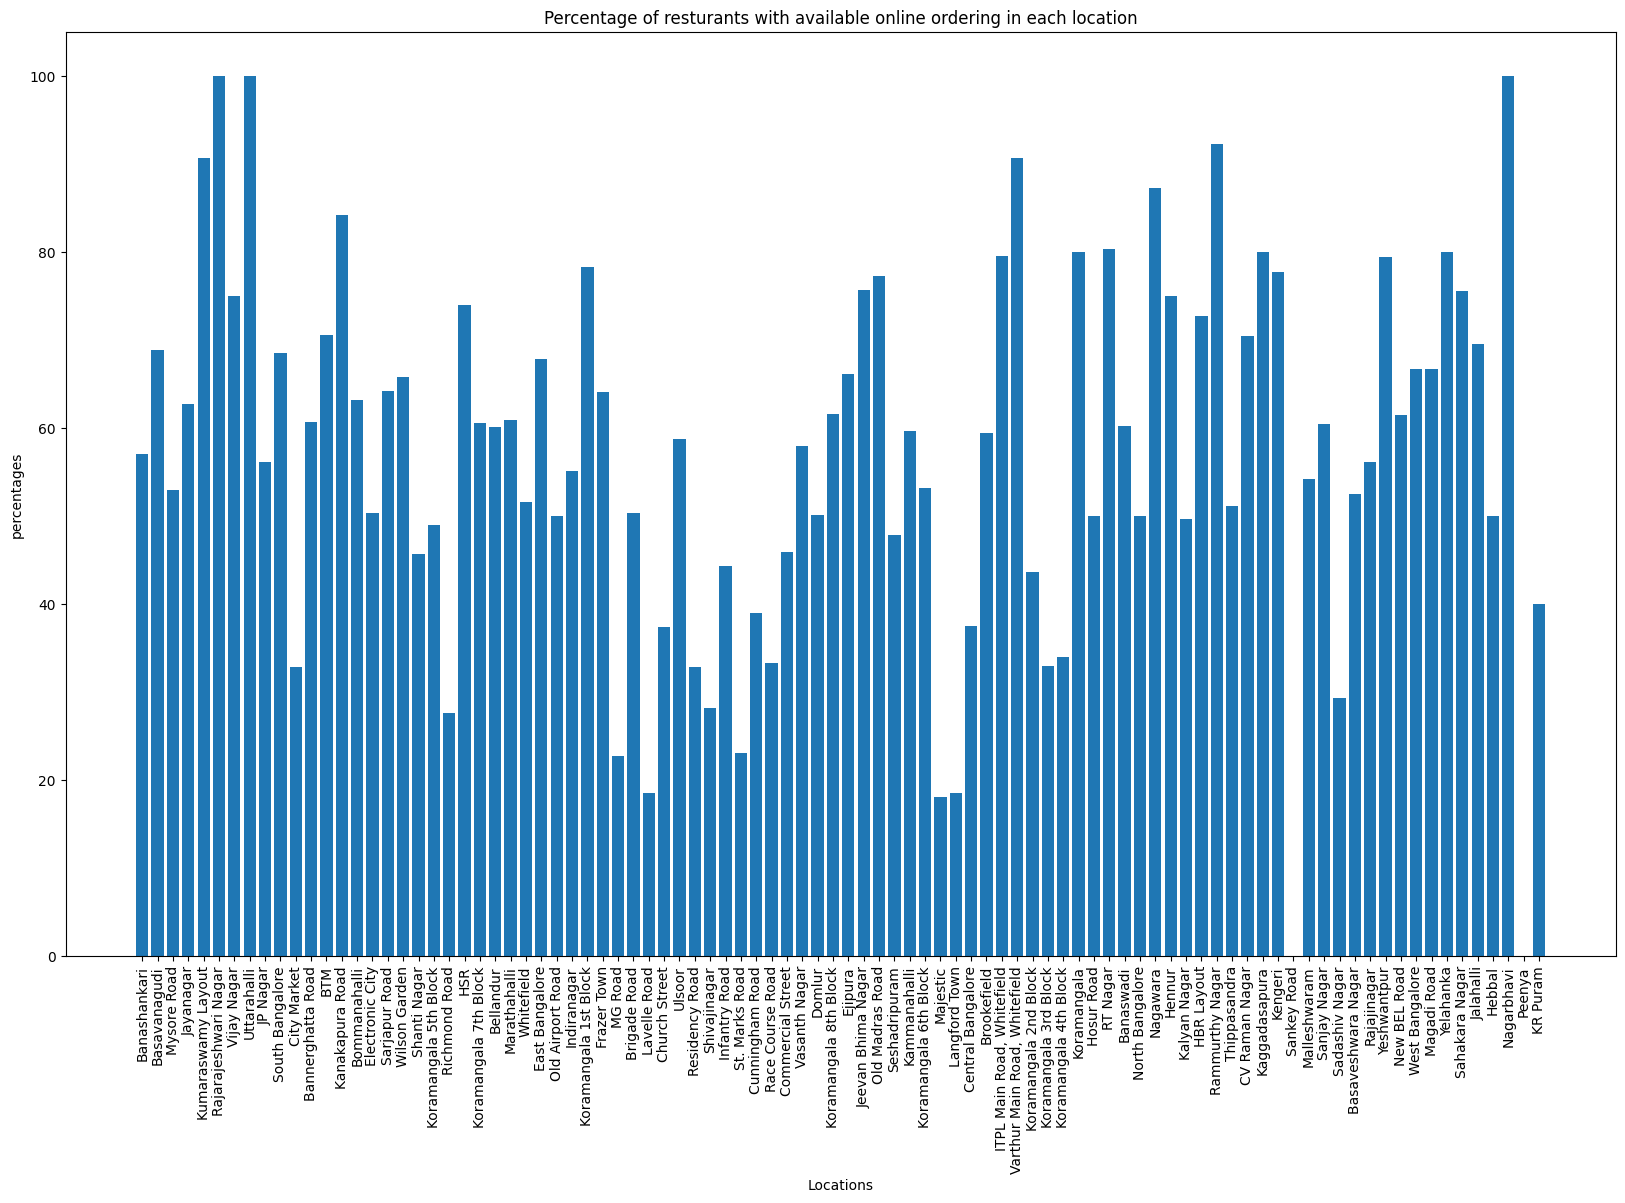

<Figure size 640x480 with 0 Axes>

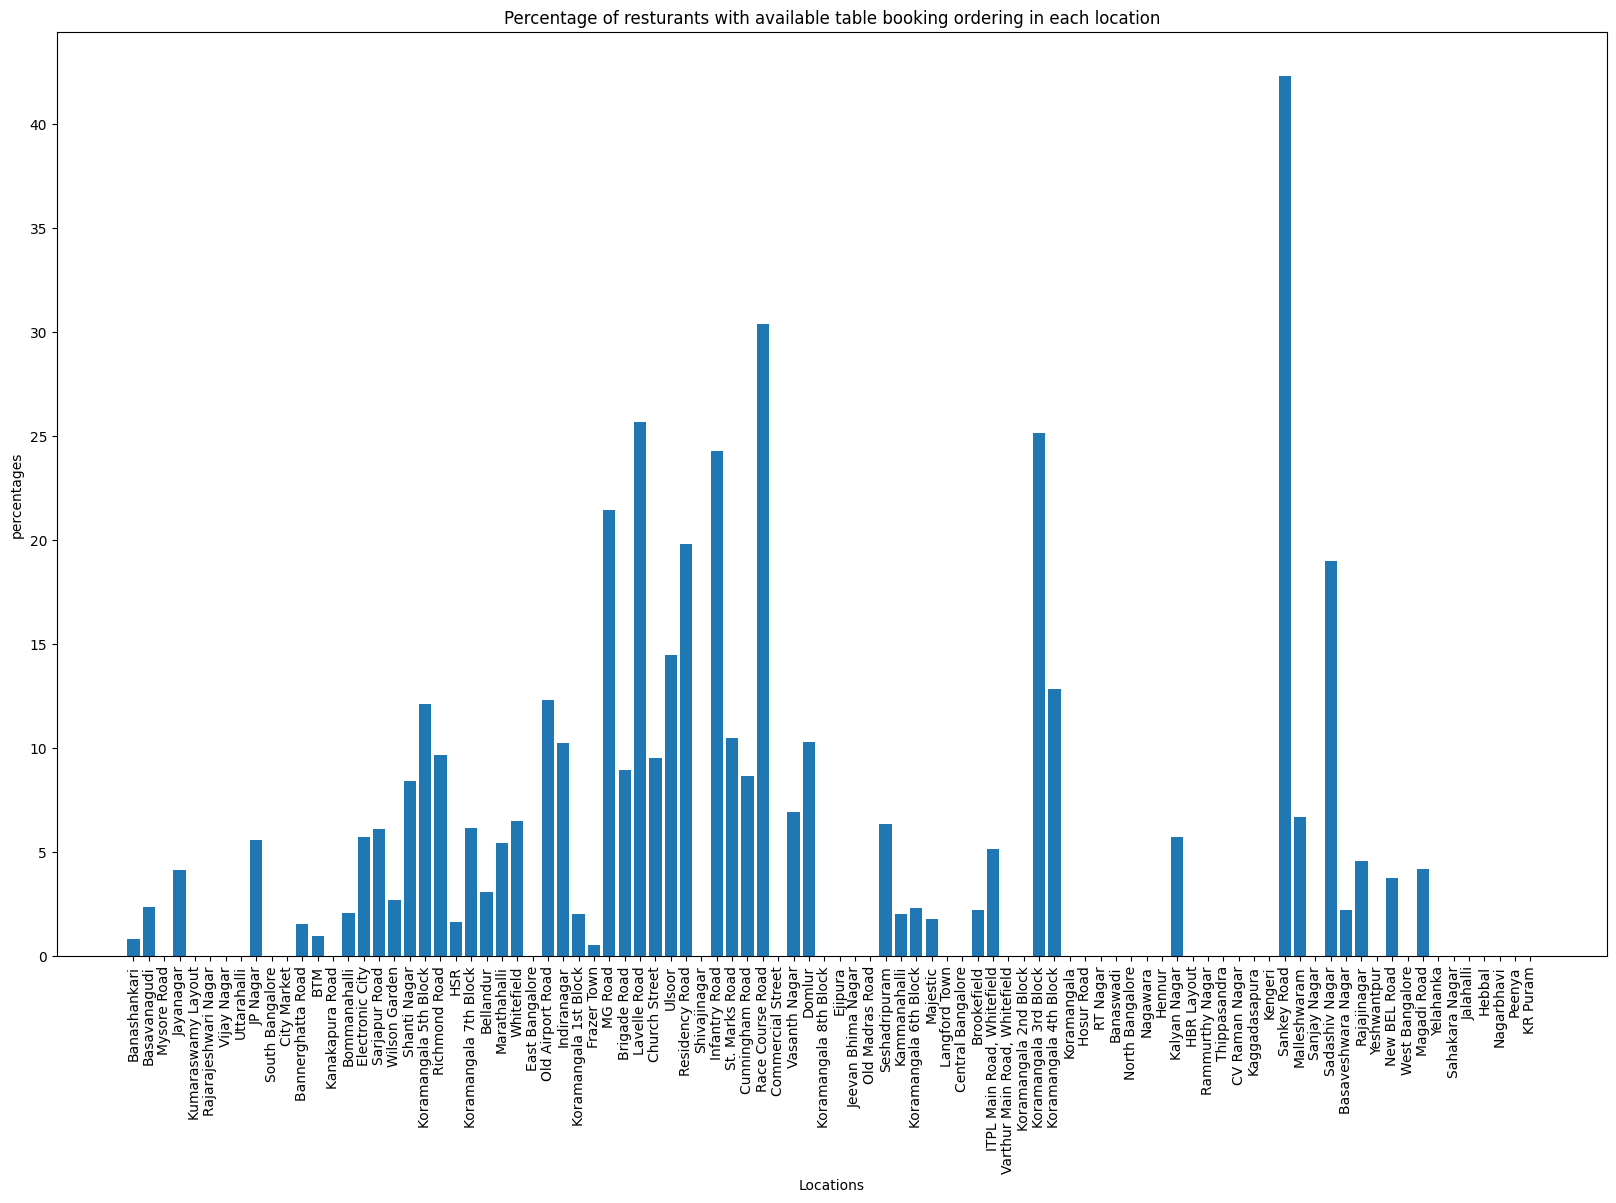

<Figure size 640x480 with 0 Axes>

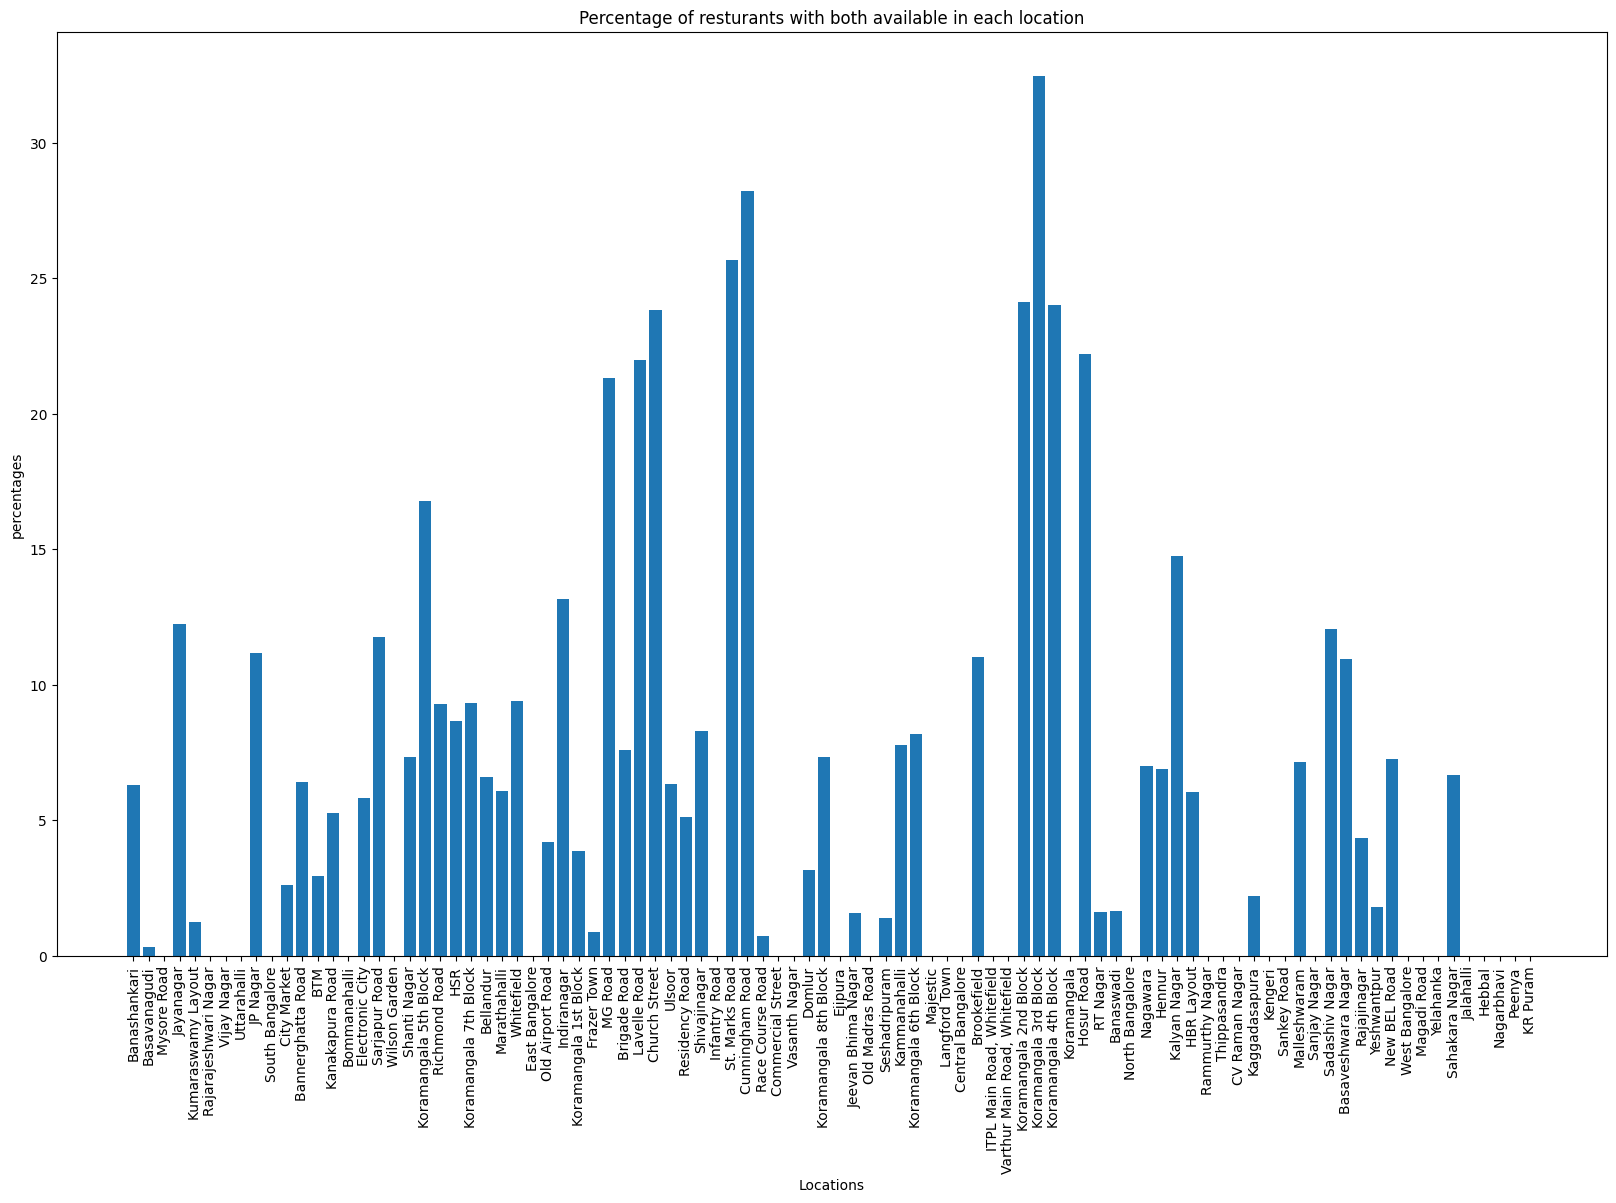

<Figure size 640x480 with 0 Axes>

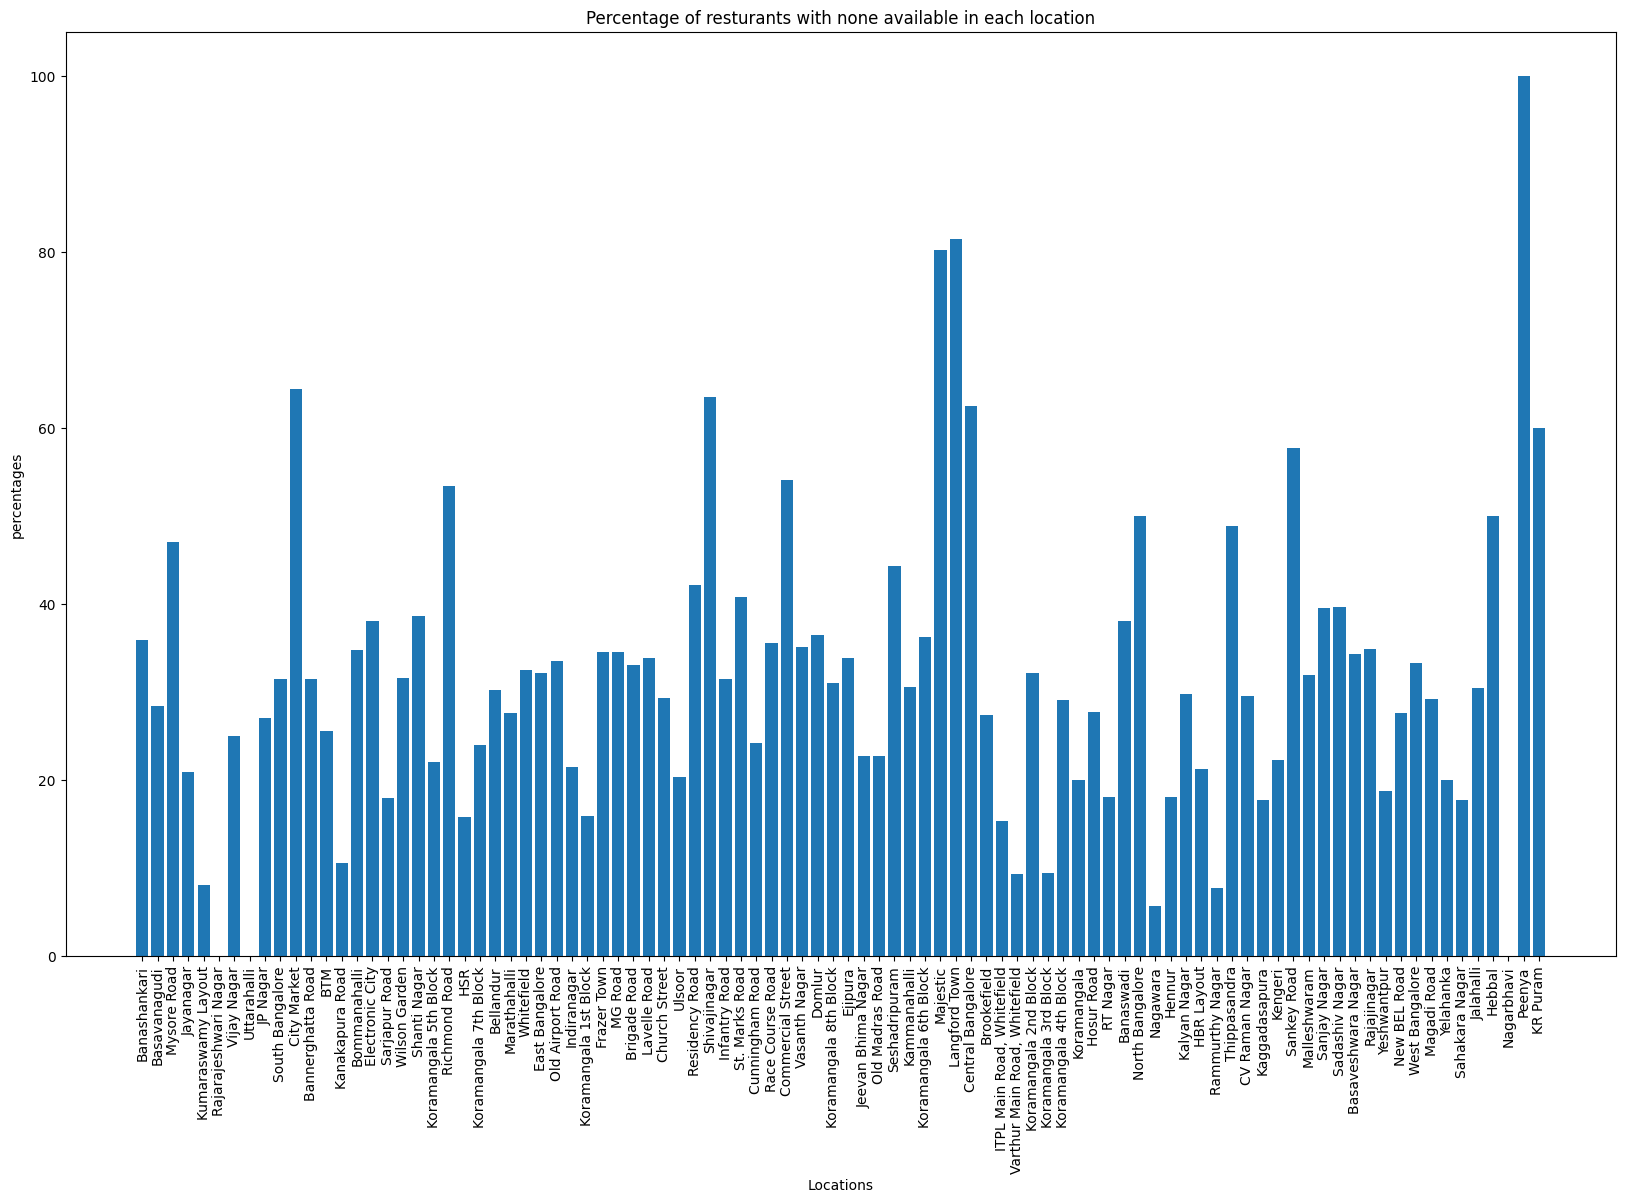

<Figure size 640x480 with 0 Axes>

In [242]:
plt.figure(figsize= (20, 12))
plt.bar(list(percentages.keys()), [stat['online orders'] for stat in percentages.values()])
plt.xlabel('Locations')
plt.ylabel('percentages')
plt.xticks(rotation= 90)
plt.title('Percentage of resturants with available online ordering in each location')
plt.show()
plt.clf()
plt.figure(figsize= (20, 12))
plt.bar(list(percentages.keys()), [stat['table booking orders'] for stat in percentages.values()])
plt.xlabel('Locations')
plt.ylabel('percentages')
plt.xticks(rotation= 90)
plt.title('Percentage of resturants with available table booking ordering in each location')
plt.show()
plt.clf()
plt.figure(figsize= (20, 12))
plt.bar(list(percentages.keys()), [stat['both'] for stat in percentages.values()])
plt.xlabel('Locations')
plt.ylabel('percentages')
plt.xticks(rotation= 90)
plt.title('Percentage of resturants with both available in each location')
plt.show()
plt.clf()
plt.figure(figsize= (20, 12))
plt.bar(list(percentages.keys()), [stat['none'] for stat in percentages.values()])
plt.xlabel('Locations')
plt.ylabel('percentages')
plt.xticks(rotation= 90)
plt.title('Percentage of resturants with none available in each location')
plt.show()
plt.clf()

### Location plays a significant role in affecting the percentages of the ordering ways available so having the mean, median, percentage of all the resturants with ignoring the location will result in a biased/misleading insight

## what should we do in order to get the best customer satisfaction?

### After we have seen the data we can see that the location have a big effect on almost every other variable and also we can define the customer satisfaction through the resturants with top ratings so the next steps will be getting each location top resturants and start having a look at what they do in order to have this rating/customer satisfaction

In [248]:
def extract_data(resturants):
    resturants_data = {}
    for _, resturant in resturants.iterrows():
        resturants_data[resturant['name']] = {
        'rate': resturant['rate'],
        'average cost for 2 people': round(np.exp(resturant['cost_log']), 2),
        'type': resturant['listed_in(type)'],
        'cuisines': list(set(resturant['cuisines'])),
        'rest type': list(set(resturant['rest_type'])),
        'online order': resturant['online_order'],
        'book table': resturant['book_table']
        }
    return resturants_data
        
def rate_loc(locations):
    resturants = {}
    for loc in locations:
        top_resturants = zomato[zomato['location'] == loc][['rate', 'name', 'cost_log', 'online_order', 'book_table', 'rest_type', 'listed_in(type)', 'cuisines']].sort_values(by= 'rate', ascending= False).head(5)
        resturants_data = extract_data(top_resturants)
        top_cuisines_series= top_resturants['cuisines'].explode()
        top_cuisines= top_cuisines_series.value_counts(ascending= False).head(3).index.tolist()
        top_rests_series= top_resturants['rest_type'].explode()
        top_rests= top_rests_series.value_counts(ascending= False).head(3).index.tolist()
        top_types= top_resturants['listed_in(type)'].value_counts(ascending= False).head(3).index.tolist()
        online = top_resturants[(top_resturants['online_order'] == 'Yes') & (top_resturants['book_table'] == 'No')].shape[0]
        booked = top_resturants[(top_resturants['online_order'] == 'No') & (top_resturants['book_table'] == 'Yes')].shape[0]
        both = top_resturants[(top_resturants['online_order'] == 'Yes') & (top_resturants['book_table'] == 'Yes')].shape[0]
        none= top_resturants[(top_resturants['online_order'] == 'No') & (top_resturants['book_table'] == 'No')].shape[0]
        stats= {
            'top rating': top_resturants['rate'].head(1).values,
            'average cost': round(np.exp(np.mean(top_resturants['cost_log'])), 2),
            'top 3 cuisines': top_cuisines,
            'top 3 rest types': top_rests,
            'top 3 types': top_types,
            'book table percentage': (booked/5) * 100,
            'online order percentage': (online/5) * 100,
            'both': (both/5) * 100,
            'none': (none/5) * 100
        }
        resturants[loc] = {
            f'top resturants in {loc}': resturants_data,
            'summary statistics': stats
        }
    return resturants

top_rated_resturants = rate_loc(locations)
top_rated_resturants


{'Banashankari': {'top resturants in Banashankari': {'Taaza Thindi': {'rate': 4.7,
    'average cost for 2 people': np.float64(100.0),
    'type': 'Dine-out',
    'cuisines': ['South Indian'],
    'rest type': ['Quick Bites'],
    'online order': 'No',
    'book table': 'No'},
   'Onesta': {'rate': 4.6,
    'average cost for 2 people': np.float64(600.0),
    'type': 'Dine-out',
    'cuisines': ['Pizza', 'Italian', 'Cafe'],
    'rest type': ['Cafe', 'Casual Dining'],
    'online order': 'Yes',
    'book table': 'Yes'}},
  'summary statistics': {'top rating': array([4.7]),
   'average cost': np.float64(419.3),
   'top 3 cuisines': ['Pizza', 'Cafe', 'Italian'],
   'top 3 rest types': ['Casual Dining', 'Cafe', 'Quick Bites'],
   'top 3 types': ['Dine-out', 'Delivery', 'Cafes'],
   'book table percentage': 0.0,
   'online order percentage': 0.0,
   'both': 80.0,
   'none': 20.0}},
 'Basavanagudi': {'top resturants in Basavanagudi': {"Brahmin's Coffee Bar": {'rate': 4.8,
    'average cost fo

## what is the average price for 2?

### as I found out before the average price is affected a lot by the location that's why I should get the average price for each location?

In [ ]:
def location_cost(locations):
    avg_costs = {}
    for loc in locations:
        avg_cost_loc = round(np.exp(np.mean(zomato[zomato['location'] == loc]['cost_log'])), 2)
        avg_costs[loc] = avg_cost_loc
    return avg_costs
avg_costs = location_cost(locations)
avg_costs

{'Banashankari': np.float64(383.76),
 'Basavanagudi': np.float64(297.05),
 'Mysore Road': np.float64(408.87),
 'Jayanagar': np.float64(416.55),
 'Kumaraswamy Layout': np.float64(327.1),
 'Rajarajeshwari Nagar': np.float64(714.14),
 'Vijay Nagar': np.float64(342.48),
 'Uttarahalli': np.float64(381.04),
 'JP Nagar': np.float64(469.2),
 'South Bangalore': np.float64(301.48),
 'City Market': np.float64(291.18),
 'Bannerghatta Road': np.float64(420.89),
 'BTM': np.float64(372.0),
 'Kanakapura Road': np.float64(468.47),
 'Bommanahalli': np.float64(424.71),
 'Electronic City': np.float64(469.54),
 'Sarjapur Road': np.float64(500.97),
 'Wilson Garden': np.float64(369.64),
 'Shanti Nagar': np.float64(431.31),
 'Koramangala 5th Block': np.float64(564.25),
 'Richmond Road': np.float64(667.36),
 'HSR': np.float64(434.81),
 'Koramangala 7th Block': np.float64(512.1),
 'Bellandur': np.float64(472.76),
 'Marathahalli': np.float64(467.27),
 'Whitefield': np.float64(547.08),
 'East Bangalore': np.float